In [29]:
import networkx as nx
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import pairwise_distances, silhouette_samples, silhouette_score

import numpy as np
import pandas as pd
from datetime import datetime

from collections import Counter
import itertools

from math import comb, ceil
import random
import string

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import multiprocessing as mp

import pickle

import sys
sys.path.insert(1, '../scripts')
import modeling_v2

import importlib
importlib.reload(modeling_v2)

import matplotlib.ticker as plticker
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 14

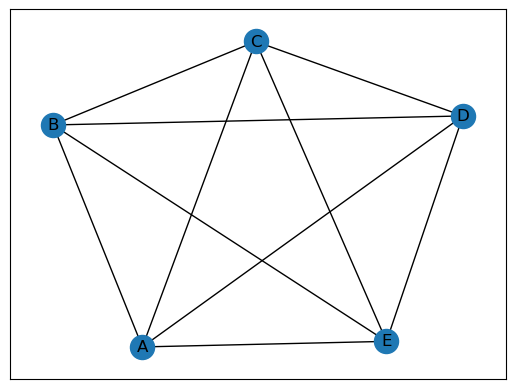

In [8]:
n_beliefs = 5
m = 10
bn = modeling_v2.create_belief_network(m = m,
                                        n_beliefs = n_beliefs,
                                        complete = True)

nx.draw_networkx(bn)

In [60]:
association_matrix = modeling_v2.init_association_matrix(bn, propositions = [*bn.nodes()])
association_matrix

,+A,0A,-A,+B,0B,-B,+C,0C,-C,+D,0D,-D,+E,0E,-E
+A,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1
0A,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1
-A,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1
+B,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1
0B,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1
-B,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1
+C,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1
0C,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1
-C,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1
+D,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1


In [61]:
agent_beliefs = modeling_v2.init_beliefs(propositions = [*bn.nodes()])

In [62]:
agent_beliefs

{'A': 0.6435442046125144,
 'B': 0.42635671493832206,
 'C': -0.6022966815827364,
 'D': -0.3939234536404055,
 'E': -0.6109726815847631}

In [63]:
beliefs_to_convey =  list(np.random.choice([*beliefs.keys()], 2, replace=False))
beliefs_to_convey

['E', 'D']

In [64]:
message_to_convey = modeling_v2.deduce_message_to_convey(beliefs_to_convey, agent_beliefs, gamma=.3)
message_to_convey

{'e1': '-E', 'e2': '-D'}

In [75]:
modeling_v2.update_association_matrix(message_to_convey, association_matrix)
association_matrix

,+A,0A,-A,+B,0B,-B,+C,0C,-C,+D,0D,-D,+E,0E,-E
+A,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1
0A,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1
-A,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1
+B,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1
0B,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1
-B,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1
+C,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1
0C,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1
-C,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1
+D,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1


In [76]:
modeling_v2.infer_relationship(message_to_convey, association_matrix)

0.17073170731707318 0.04878048780487805 0.14634146341463414


1

In [41]:
list(beliefs_to_convey)


['C', 'E']

In [51]:
importlib.reload(modeling_v2)

<module 'modeling_v2' from '/media/volume/data/pairwise_diffusion/notebooks/../scripts/modeling_v2.py'>

In [52]:
sim_no = 0
random_seed = np.random.randint(100000)
n_beliefs = 4
m = 6
gamma = .3
n_nodes_to_connect = 1
n_agents = 2
last_step = 20000
is_composed = False

results = modeling_v2.simulate_multiple_agents(sim_no, random_seed, n_beliefs, m, gamma, n_nodes_to_connect, n_agents, last_step, is_composed)

  0%|          | 0/20001 [00:00<?, ?it/s]

100%|██████████| 20001/20001 [00:31<00:00, 642.05it/s]


In [53]:
results['track'][0]['belief_networks']

array([[-0.10778673, -0.59159055, -0.19737486, -0.36210098],
       [ 0.21412715, -0.1438989 , -0.1116958 , -0.11386378]])

In [54]:
results['track'][20000]['belief_networks']

array([[-0.10778673, -1.        , -0.19737486, -1.        ],
       [ 0.21412715, -1.        , -0.1116958 , -1.        ]])